## Contents
### 1. Importing libraries & data preprocessing
### 2. Application of Models
   #### 2.1. Logistic Regression
   #### 2.2. Random Forest
   #### 2.3. K-Nearest Neighbors
   #### 2.4. Adaboost
   #### 2.5. XGBoost
   #### 2.6. ANN Model
### 3. Comparison of Models
### 4. VIF and Feature Importance
### 5. Conclusion

### 1. Importing libraries & data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,KFold,RandomizedSearchCV,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,mean_squared_error,make_scorer
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_score, f1_score, precision_recall_curve, auc

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

from keras_visualizer import visualizer
from keras import models,layers
from keras.layers import Dropout
from keras.models import Model
from scikeras.wrappers import KerasClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.inspection import permutation_importance #use the other one
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif
from random import randint

%matplotlib inline

In [2]:
df = pd.read_csv('../data/data.csv',sep=',')

This dataset is from the Taiwan Economic Journal. The information collected on these companies was from the years 1999 to 2009. The definition of Company Bankruptcy was based on the business regulations of the Taiwan Stock Exchange.

In [3]:
df.columns = df.columns.str.strip()
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

In [4]:
X = df.drop(columns='Bankrupt')
y = df['Bankrupt']

In [5]:
df['Bankrupt']=df['Bankrupt'].map({1: 'yes', 0: 'no'})

Text(0, 0.5, 'Count')

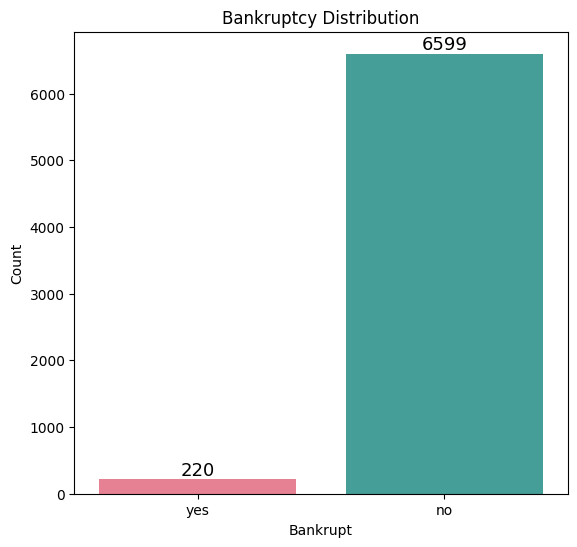

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(x='Bankrupt',data=df,palette='husl')
ax.bar_label(ax.containers[0],size=13)
plt.title("Bankruptcy Distribution")
plt.ylabel('Count')

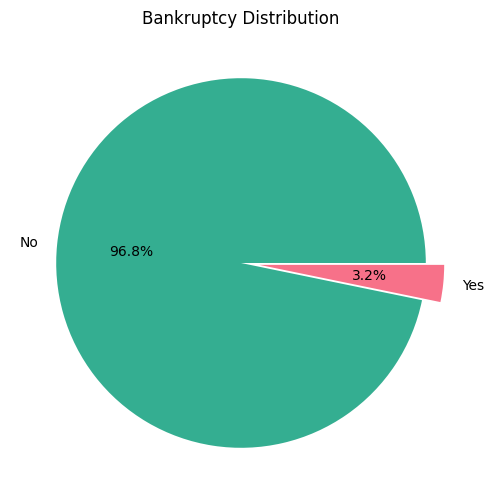

In [7]:
churned=df['Bankrupt'].value_counts()
churned.values

plt.figure(figsize=(14,6))
labels=['No','Yes']
#colors=sns.color_palette("husl")
plt.pie(churned.values,labels=labels,autopct="%1.1f%%",explode=(0,0.1),colors=['#34ae91','#f77189'])
plt.title('Bankruptcy Distribution')
plt.show()

For this dataset, there is a huge disparity between those companies that got bankrupt and those that didn't. Only 3.2% of the companies went bankrupt. This means that the dataset has to be balanced later.

Liability-Assets Flag  Bankrupt
0                      no          6597
                       yes          214
1                      yes            6
                       no             2
dtype: int64


Text(0, 0.5, '')

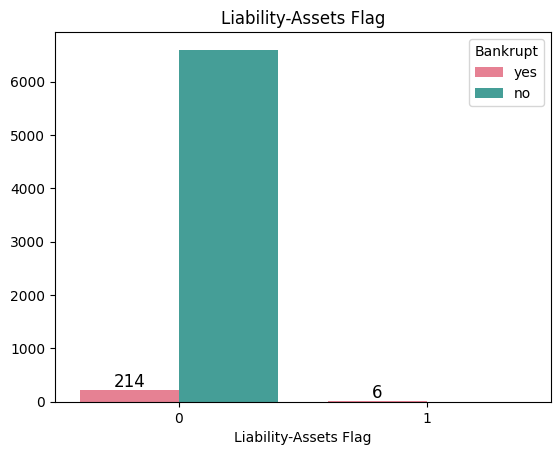

In [8]:
print(df[['Liability-Assets Flag','Bankrupt']].value_counts())
ax=sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt',data = df,palette = 'husl')
ax.bar_label(ax.containers[0],size=12)
plt.title("Liability-Assets Flag")
plt.ylabel('')

The liability asset flag highlights when a company has more liabilities than assets. Majority of the companies in this dataset have more liabilities than assets, which means that they currently owe more than what they are owed. It can be observed that a small percentage of these organizations go bankrupt even when they have more assets than liabilites.

Net Income Flag  Bankrupt
1                no          6599
                 yes          220
dtype: int64


Text(0, 0.5, '')

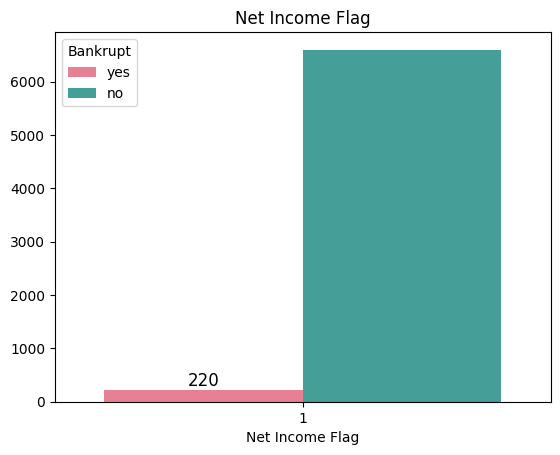

In [9]:
#value = randint(0, len(colors)-1)

print(df[['Net Income Flag','Bankrupt']].value_counts())
#sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt',data = df,palette = colors[value])
ax=sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt',data = df,palette = 'husl')
ax.bar_label(ax.containers[0],size=12)
plt.title("Net Income Flag")
plt.ylabel('')

The net income flag is an indication of the income status of the organization over the last two years. If the net income for the last two years is negative, it is flagged as 1. Every single organization that is used in this prediction suffered losses in the last two years.

In [10]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [11]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=1)
X,y=smote.fit_resample(X,y)

Smote stands for Synthetic Minority Oversampling Technique. It is used to address imbalanced datasets such as this. It analyzes the data and creates synthetic samples of the minority data points in order to balance the data. By balancing the data, it allows the algorithms to learn the data better.

In [12]:
X.shape

(13198, 95)

### 2. Application of Models

#### 2.1. Logistic Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lrmodel=LogisticRegression(max_iter=100,solver='liblinear')
#lrmodel=LogisticRegression(solver='liblinear') # same as the above

lrmodel.fit(X_train,y_train)
y_pred = lrmodel.predict(X_test)

test_score=lrmodel.score(X_test,y_test)
print(test_score)

train_score=lrmodel.score(X_train,y_train)
print(train_score)

0.896969696969697
0.9010229210077666


Accuracy is:  0.896969696969697
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1334
           1       0.88      0.92      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



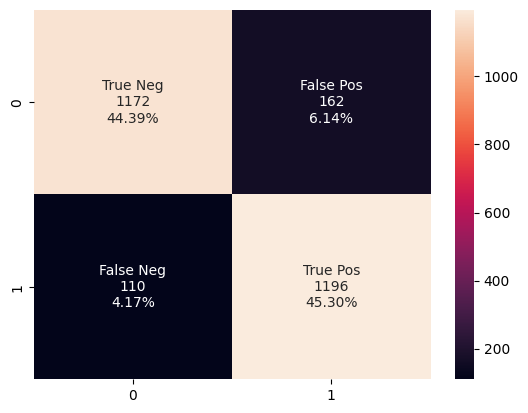

In [15]:
y_pred=lrmodel.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

Logistic Regression is selected as the baseline for this project. It has an accuracy of 0.89, and the model itself is already considered to be very accurate.

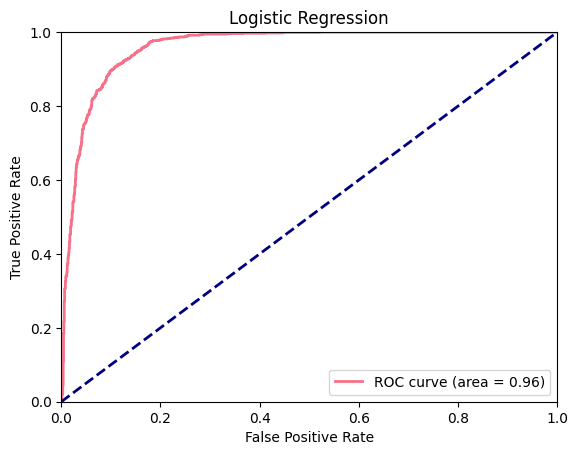

In [16]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predslr = lrmodel.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auclr = metrics.auc(fprlr, tprlr)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprlr, tprlr, color='#f77189', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auclr)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc = "lower right")
plt.show()

#### 2.2. Random Forest

The Random Forest algorithm is a good algorithm to apply to large and complex datasets. With a total of 95 features, Random Forest with Grid Search is effective because it has the ability to handle large datasets without overfitting. The parameter tuning that comes from grid search also helps to optimise the model even further.

In [22]:
rfmodel=RandomForestClassifier(random_state=42)

In [23]:
rfparam={
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 1, 10, 20],
     'min_samples_split': [2, 5, 10, 15],
     'min_samples_leaf': [1, 2, 5, 10],
     'bootstrap': [True, False]
}

In [24]:
grid_search = GridSearchCV(rfmodel, rfparam, cv=5, n_jobs=-1) #LONG RUNNNNNNNNNNN
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 1, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

Grid Search is used to determine the best parameters to run with the Random Forest algorithm.

In [25]:
best_rfparams=grid_search.best_params_ #Dont run this too
best_rfparams    

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [26]:
rfmodel=RandomForestClassifier(**best_rfparams)
rfmodel.fit(X_train,y_train)

y_pred=rfmodel.predict(X_test)

rf_test=rfmodel.score(X_test,y_test)
print(rf_test)
rf_train=rfmodel.score(X_train,y_train)
print(rf_train)

0.9878787878787879
1.0


Accuracy is:  0.9878787878787879
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



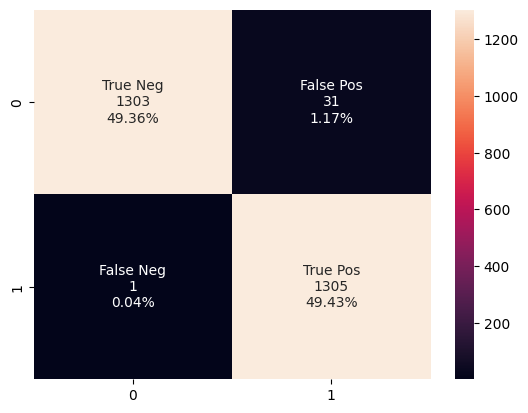

In [27]:
y_pred=rfmodel.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

It can be observed that the Random Forest algorithm used is really effective. There is only 1 False Negative and 31 False Positives result.

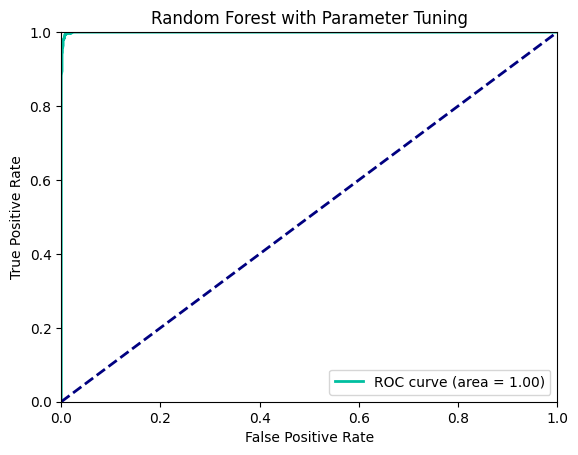

In [28]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predsrf = rfmodel.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprrf, tprrf, _ = metrics.roc_curve(y_test, predsrf)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_aucrf = metrics.auc(fprrf, tprrf)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprrf, tprrf, color='#00bfa0', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_aucrf)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Parameter Tuning')
plt.legend(loc = "lower right")
plt.show()

The Area Under Curve(AUC) of the Random Forest algorithm is almost 1.

#### 2.3. K-Nearest Neighbors (KNN)

K-Nearest Neighbors(KNN) can be used for both classification and regression problems. Although it is a simple algorithm as compared to the rest, it excels in recognising patterns and helps to predict bankruptcy accordingly. It is often used in the finance industry as well.

In [29]:
knn=KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [32]:
%%time
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%%time
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

CPU times: total: 11.1 s
Wall time: 6min 52s


In [34]:
best_knnparams=grid_result.best_params_ #Dont run this too
best_knnparams 

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [35]:
knnmodel=KNeighborsClassifier(**best_knnparams)
knnmodel.fit(X_train,y_train)

y_pred=knnmodel.predict(X_test)

knn_test=knnmodel.score(X_test,y_test)
print(knn_test)
knn_train=knnmodel.score(X_train,y_train)
print(knn_train)

0.9678030303030303
1.0


Accuracy is:  0.9678030303030303
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1334
           1       0.94      1.00      0.97      1306

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



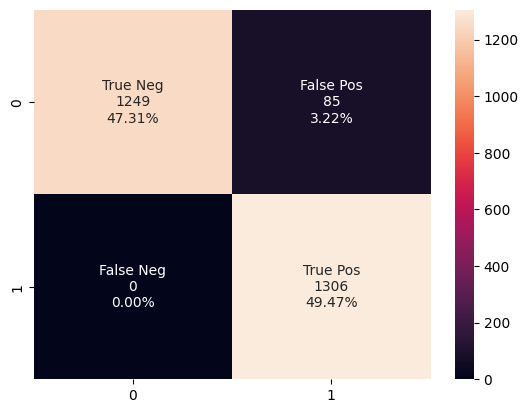

In [36]:
y_pred=knnmodel.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

KNN does not have a single false negative prediction at all.

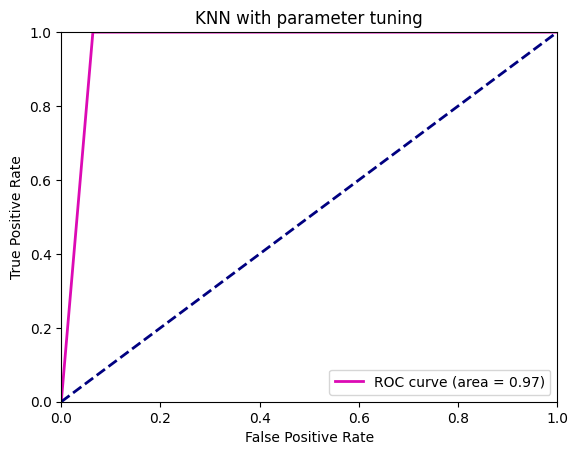

In [37]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predsknn = knnmodel.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprknn, tprknn, _ = metrics.roc_curve(y_test, predsknn)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_aucknn = metrics.auc(fprknn, tprknn)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprknn, tprknn, color='#dc0ab4', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_aucknn)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with parameter tuning')
plt.legend(loc = "lower right")
plt.show()

#### 2.4. Adaboost

In [38]:
ada=AdaBoostClassifier() #default is 50 n_estimators
ada.fit(X_train,y_train)

y_pred=ada.predict(X_test)

ada_test=ada.score(X_test,y_test)
print(ada_test)
ada_train=ada.score(X_train,y_train)
print(ada_train)

0.9306818181818182
0.9366357264633454


Accuracy is:  0.9306818181818182
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1334
           1       0.92      0.94      0.93      1306

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



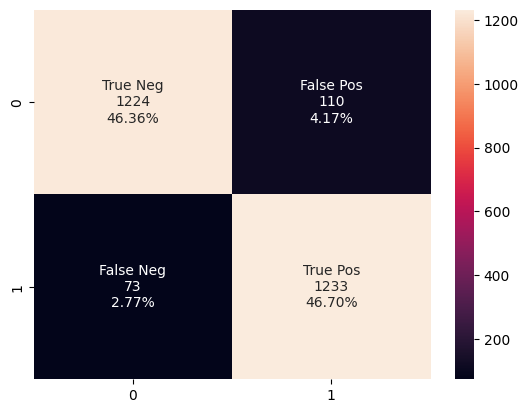

In [39]:
y_pred=ada.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

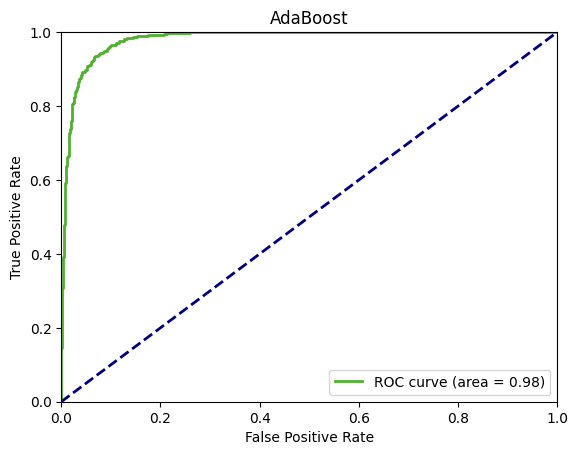

In [40]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predsada = ada.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprada, tprada, _ = metrics.roc_curve(y_test, predsada)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_aucada = metrics.auc(fprada, tprada)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprada, tprada, color='#50b131', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_aucada)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost')
plt.legend(loc = "lower right")
plt.show()

#### 2.5. XGBoost

In [41]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

xgb_test=xgb.score(X_test,y_test)
print(xgb_test)
xgb_train=xgb.score(X_train,y_train)
print(xgb_train)

0.9878787878787879
1.0


Accuracy is:  0.9878787878787879
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



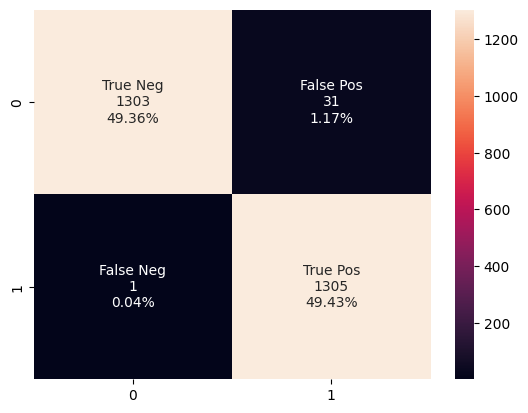

In [42]:
y_pred=xgb.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

Similar to Random Forest, it has an accuracy of 0.98 and is effective in predicting bankruptcy.

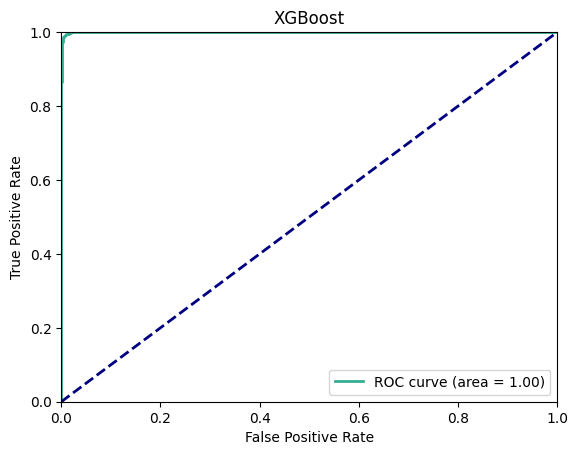

In [43]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predsxgb = xgb.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprxgb, tprxgb, _ = metrics.roc_curve(y_test, predsxgb)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprxgb, tprxgb, color='#34ae91', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_aucxgb)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost')
plt.legend(loc = "lower right")
plt.show()

#### 2.6. ANN Model

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
n_cols=X.shape[1]
n_cols

95

In [17]:
def normalmodel():
    
    model=Sequential()
    
    #Input layer 1
    model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_shape = (n_cols, )))
    #Dropout layer
    model.add(Dropout(0.2))
    #Input layer 2
    model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
    #Input layer 3
    model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
    #Input layer 4
    model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))
    #Input layer 5
    model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
    #Output layer
    model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
    
    #Compile model
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],weighted_metrics=[])
    
    return model

For the ANN model, it is a sequential model and it consists of 5 input layers and 1 dropout layer. The number of nodes gradually decreases when it gets closer to the output layer.

In [18]:
ann=KerasClassifier(model = normalmodel,validation_split=0.33,epochs=100,verbose=1,optimizer='adam',batch_size=10)

In [19]:
%%time
norm=ann.fit(X_train,y_train)

Epoch 1/100
708/708 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8754 - val_loss: 0.2058 - val_accuracy: 0.9280
Epoch 2/100
708/708 [==============================] - 1s 2ms/step - loss: 0.2102 - accuracy: 0.9234 - val_loss: 0.1784 - val_accuracy: 0.9346
Epoch 3/100
708/708 [==============================] - 1s 2ms/step - loss: 0.1711 - accuracy: 0.9399 - val_loss: 0.1346 - val_accuracy: 0.9515
Epoch 4/100
708/708 [==============================] - 2s 2ms/step - loss: 0.1418 - accuracy: 0.9492 - val_loss: 0.1099 - val_accuracy: 0.9615
Epoch 5/100
708/708 [==============================] - 2s 2ms/step - loss: 0.1189 - accuracy: 0.9637 - val_loss: 0.0922 - val_accuracy: 0.9673
Epoch 6/100
708/708 [==============================] - 3s 4ms/step - loss: 0.1030 - accuracy: 0.9668 - val_loss: 0.0999 - val_accuracy: 0.9673
Epoch 7/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0851 - accuracy: 0.9713 - val_loss: 0.0814 - val_accuracy: 0.9745

Epoch 58/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.0493 - val_accuracy: 0.9900
Epoch 59/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 0.9958 - val_loss: 0.0773 - val_accuracy: 0.9848
Epoch 60/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0694 - val_accuracy: 0.9842
Epoch 61/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0479 - val_accuracy: 0.9905
Epoch 62/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0653 - val_accuracy: 0.9879
Epoch 63/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0507 - val_accuracy: 0.9879
Epoch 64/100
708/708 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0664 - val_accuracy:

In [20]:
ann_acc=norm.score(X_test,y_test)
ann_acc

264/264 [==============================] - 0s 1ms/step


0.9825757575757575

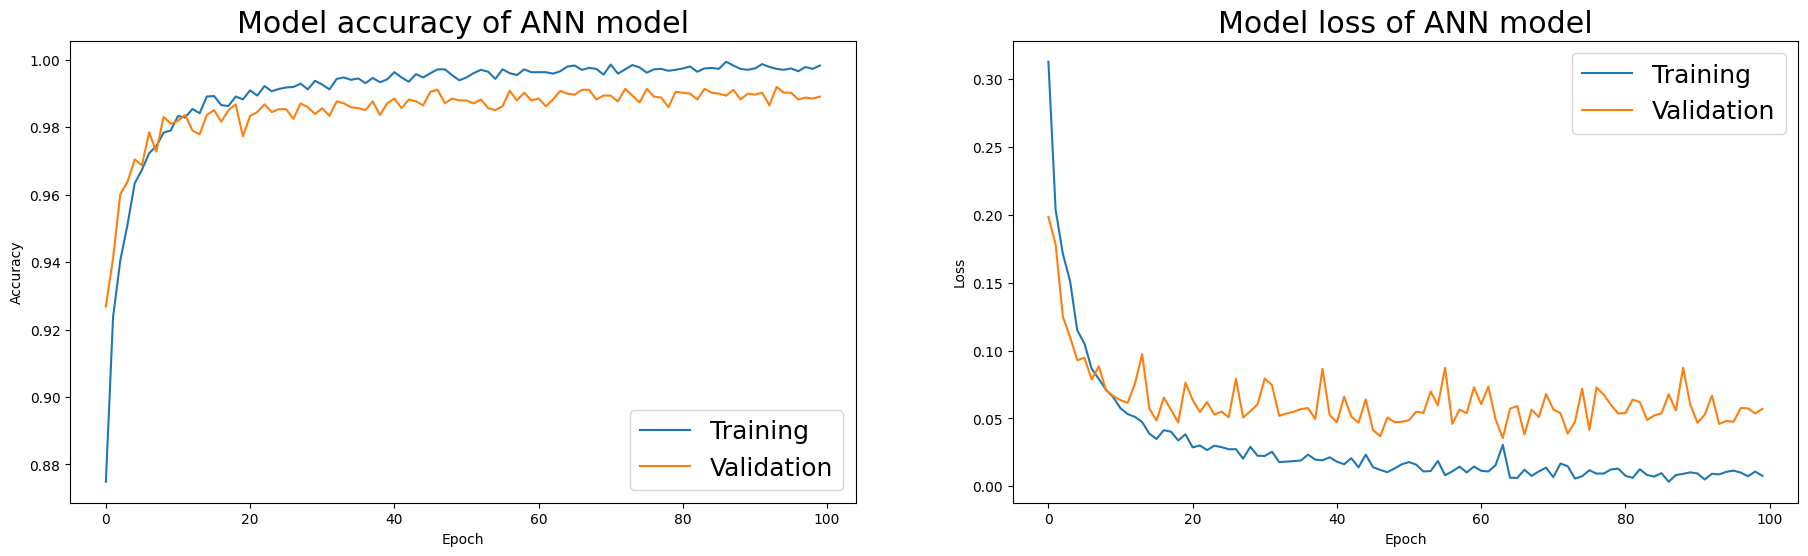

In [24]:
# Plotting of accuracy and loss of model
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(norm.history_['accuracy'], label = 'Training')
ax[0].plot(norm.history_['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy of ANN model')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(norm.history_['loss'], label = 'Training')
ax[1].plot(norm.history_['val_loss'], label = 'Validation')
ax[1].set_title('Model loss of ANN model')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

The ANN model is run with 100 epochs with a batch size of 10 and adam optimizer. The reason why 100 epochs are used is to ensure that the training and validation accuracy remain relatively similar, which means that it isn't overfitting or underfitting. There was an attempt to increase the number of epochs from 100 to 200 and higher values, but there is not much significant difference when compared to 100 epochs.

264/264 [==============================] - 0s 952us/step
Accuracy is:  0.9825757575757575
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1334
           1       0.97      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



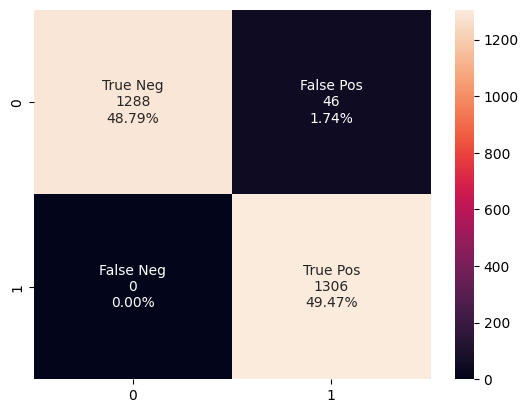

In [22]:
y_pred=norm.predict(X_test)
y_pred=(y_pred>0.5)

cm = confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ac=accuracy_score(y_test,y_pred)

print('Accuracy is: ',ac)
sns.heatmap(cm,annot=labels,fmt='');
print(classification_report(y_test,y_pred))

264/264 [==============================] - 0s 978us/step


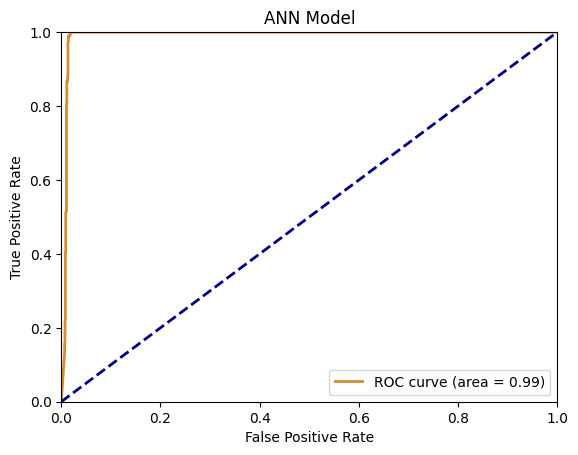

In [23]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predsnorm = norm.predict_proba(X_test)[:,1]
#predslr = lrmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprnorm, tprnorm, _ = metrics.roc_curve(y_test, predsnorm)
#fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_aucnorm = metrics.auc(fprnorm, tprnorm)
#roc_auclr = metrics.auc(fprlr, tprlr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fprnorm, tprnorm, color='#d58c32', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_aucnorm)
#plt.plot(fprlr, tprlr, color='#f77189',alpha=0.5, lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Model')
plt.legend(loc = "lower right")
plt.show()

### 3. Comparison of Models

264/264 [==============================] - 0s 1ms/step


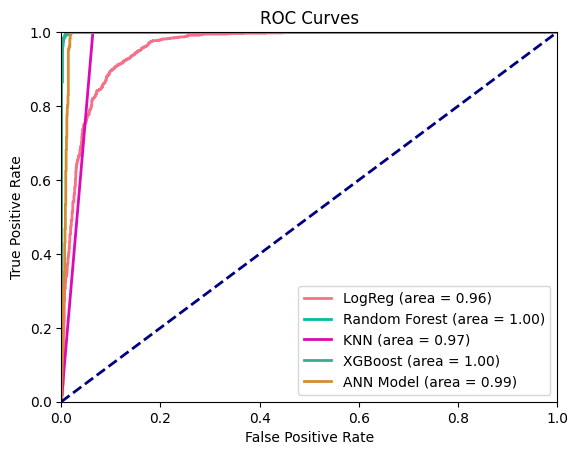

In [84]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
predslr = lrmodel.predict_proba(X_test)[:,1]
predsrf = rfmodel.predict_proba(X_test)[:,1]
predsknn = knnmodel.predict_proba(X_test)[:,1]
predsxgb = xgb.predict_proba(X_test)[:,1]
predsnorm = norm.predict_proba(X_test)[:,1]


# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fprlr, tprlr, _ = metrics.roc_curve(y_test, predslr)
fprrf, tprrf, _ = metrics.roc_curve(y_test, predsrf)
fprknn, tprknn, _ = metrics.roc_curve(y_test, predsknn)
fprxgb, tprxgb, _ = metrics.roc_curve(y_test, predsxgb)
fprnorm, tprnorm, _ = metrics.roc_curve(y_test, predsnorm)


# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auclr = metrics.auc(fprlr, tprlr)
roc_aucrf = metrics.auc(fprrf, tprrf)
roc_aucknn = metrics.auc(fprknn, tprknn)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
roc_aucnorm = metrics.auc(fprnorm, tprnorm)


# Plot the ROC Curve
plt.figure()
plt.rcParams.update({'font.size': 10})
lw = 2
plt.plot(fprlr, tprlr, color='#f77189', lw = lw, label = 'LogReg (area = %0.2f)' % roc_auclr)
plt.plot(fprrf, tprrf, color='#00bfa0', lw = lw, label = 'Random Forest (area = %0.2f)' % roc_aucrf)
plt.plot(fprknn, tprknn, color='#dc0ab4', lw = lw, label = 'KNN (area = %0.2f)' % roc_aucknn)
plt.plot(fprxgb, tprxgb, color='#34ae91', lw = lw, label = 'XGBoost (area = %0.2f)' % roc_aucxgb)
plt.plot(fprnorm, tprnorm, color='#d58c32', lw = lw, label = 'ANN Model (area = %0.2f)' % roc_aucnorm)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = "lower right")
plt.show()

When comparing all the algorithms, Random Forest, XGBoost and ANN are almost perfect in predicting bankruptcy.

As the dataset consists of 95 features, Random Forest with parameter tuning is really effective when used on a classification problem. As previously stated, it has the ability to handle large datasets without overfitting. When used alongside parameter tuning, it further optimises the model. This algorithm is highly recommended when handling large and complex datasets. The only downside is that the parameter tuning takes a while to run.

Gradient Boosting will always perform relatively better than other algorithms. In this case, it perform as well as Random Forest and ANN. However, there is always a chance of overfitting when it comes to gradient boosting algorithms. Since the performance of those algorithms are similar, Random Forset is slightly more preferred.

The ANN model performed almost as well Random Forest and XGBoost. It does take time to determine the input and output layer and the number of nodes that comes with it. As there is no parameter tuning, the ANN model takes slightly less time to run altogether. Overall, this model is also highly recommended as well, alongside Random Forest.

### 4. VIF and Feature Importance

Variance Inflation Factor(VIF) is a measurement of the value of multicollinearity among variables. It is used to reduce the number of features in the model.

On the first iteration of the modelling, a total of 95 features are used to predict bankruptcy. However, as observed earlier, having too many features means that it is inaccurate in finding out the important features that affect bankruptcy even though the performance of the model is good. In the industry, VIF is used to reduce the number of features to further identify underlying factors. VIF is a measurement of the amount of multicollinearity. Multicollinearity exists when there is a significant correlation between multiple independent variables in the model. This is especially prevalent in financial ratios, which is why it is often used. A ratio called cash flow to equity is used as a feature. However, cash flow is also being used in another ratio called cash flow to liability. VIF in this case, is specifically used to narrow down the number of variables to further determine the cause. So to reduce the number of variables, those variables with high VIF are removed from the prediction.

In [24]:
def calc_vif(X):
     vif = pd.DataFrame()
     vif["variables"] = X.columns
     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
     return vif

In [25]:
vif_result=calc_vif(X)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [26]:
high_vif_variables = vif_result[vif_result['VIF'] > 10]['variables']

Features with VIF of above 10 are being removed.

In [27]:
#df_filtered = Xb.drop(columns=high_vif_variables)
df_filtered = X.drop(columns=high_vif_variables)
df_filtered

,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-0.671081,-0.025697,-0.025299,0.019997,-0.010299,...,-1.247231,-0.206594,2.812493,-0.034272,-0.049491,-0.084274,-0.060031,-0.098978,0.0,-0.622067
1,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.303533,-0.025697,-0.027130,0.010035,-0.001930,...,-0.449376,-0.109511,0.527485,-0.034272,-0.049491,-0.021388,15.129816,0.364559,0.0,-0.535573
2,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,-0.930172,-0.025697,0.029163,0.010605,-0.003748,...,-0.937979,-0.082328,-0.199721,-0.034272,-0.049491,-0.005984,-0.062961,-0.125015,0.0,-0.621960
3,-0.616334,-0.750713,-0.101310,-0.151921,-0.829388,-0.102688,-0.025697,-0.029953,0.002370,-0.007039,...,0.182559,-1.018533,1.158899,-0.034272,-0.049491,-0.080226,-0.053903,-0.052562,0.0,-0.471826
4,1.820772,-0.750713,-0.275028,-0.151921,-0.829388,-0.245288,-0.025697,-0.025827,0.025876,-0.001329,...,-0.255245,-0.309818,0.525867,-0.034272,-0.049491,-0.032052,-0.178037,0.776395,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,1.695533,-0.140621,-0.205292,-0.151921,-0.829388,-0.085328,-0.025697,-0.032610,-0.021347,-0.007831,...,0.036258,-0.110172,2.139115,-0.034272,-0.049491,-0.485612,-0.066283,-0.174813,0.0,-0.571425
13194,1.129263,-0.439234,-0.380650,-0.151921,-0.829388,-0.467521,-0.025697,-0.036391,-0.038721,-0.011587,...,-0.608786,0.007787,-0.009153,-0.034272,-0.049491,-0.073364,-0.075710,-0.357946,0.0,-0.573652
13195,1.836989,0.632260,0.036036,-0.151921,-0.829388,0.349675,-0.025697,-0.030831,-0.005025,-3.283573,...,0.918088,-0.348826,0.074061,-0.034272,-0.049491,-0.008700,-0.067743,-0.183366,0.0,-0.441893
13196,-0.407695,-0.699692,-0.358020,-0.151921,-0.829388,-0.346220,-0.025697,-0.026950,0.015738,-0.003053,...,-0.508793,-0.082514,2.042966,-0.034272,-0.049491,-0.127437,-0.298874,0.486463,0.0,-0.669775


After applying VIF, a total of 54 features are left.

In [28]:
df_filtered.shape

(13198, 54)

The mutual information criterion is used to further reduce the number of features. Mutual information measures the amount of information from one feature with respect to the next feature. A feature with high mutual information indicates a large reduction in uncertainty. 

In [29]:
#ig = mutual_info_classif(df_filtered, yb)
ig = mutual_info_classif(df_filtered, y) #13198,13198

In [30]:
df1=pd.Series()

for i, feature in enumerate(df_filtered.columns):
    print(f"Information gain of {feature}: {ig[i]}")
    if ig[i]>=0.2:
        df1[feature]=ig[i]

Information gain of Operating Expense Rate: 0.07831570942820543
Information gain of Research and development expense rate: 0.29284460605944385
Information gain of Cash flow rate: 0.15493860801400627
Information gain of Interest-bearing debt interest rate: 0.012722149271645833
Information gain of Tax rate (A): 0.1567522205838301
Information gain of Cash Flow Per Share: 0.37866371688002176
Information gain of Revenue Per Share (Yuan ¥): 0.02297383101490391
Information gain of Realized Sales Gross Profit Growth Rate: 0.07687144539629265
Information gain of Operating Profit Growth Rate: 0.08000879320534504
Information gain of Continuous Net Profit Growth Rate: 0.11988450254551242
Information gain of Total Asset Growth Rate: 0.42659985891111596
Information gain of Net Value Growth Rate: 0.0
Information gain of Total Asset Return Growth Rate Ratio: 0.17220352129090677
Information gain of Cash Reinvestment %: 0.09365058608227095
Information gain of Current Ratio: 0.12743555410723162
Informati

C:\Users\Darry\AppData\Local\Temp\ipykernel_20920\2942895503.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1=pd.Series()


In [31]:
df1.sort_values(ascending=False)

Total Asset Turnover                                  0.508055
Net Worth Turnover Rate (times)                       0.435812
Total Asset Growth Rate                               0.426600
Cash Flow Per Share                                   0.378664
Interest Expense Ratio                                0.313783
Degree of Financial Leverage (DFL)                    0.312305
Interest Coverage Ratio (Interest expense to EBIT)    0.302894
Research and development expense rate                 0.292845
Retained Earnings to Total Assets                     0.290525
Cash Turnover Rate                                    0.277479
Total income/Total expense                            0.270953
Inventory Turnover Rate (times)                       0.235547
Equity to Liability                                   0.231695
Operating profit per person                           0.231200
dtype: float64

After using the mutual information criterion, the number of features is further reduced to 14.

In [33]:
#x9=df[df1.index] #used back the old df, hence it becomes 6819 again

In [71]:
X9=X[df1.index]

With the reduced features, a new ANN model will be fitted. From the result, feature importance will be applied to determine the most important features that determines bankruptcy.

In [78]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y, test_size=0.2, random_state=42)

In [75]:
n_cols=X9.shape[1]
n_cols

14

In [80]:
%%time
norm_vif=ann.fit(X9_train,y9_train)

Epoch 1/100
708/708 [==============================] - 3s 3ms/step - loss: 0.3734 - accuracy: 0.8493 - val_loss: 0.2996 - val_accuracy: 0.8821
Epoch 2/100
708/708 [==============================] - 2s 3ms/step - loss: 0.2960 - accuracy: 0.8858 - val_loss: 0.2576 - val_accuracy: 0.8984
Epoch 3/100
708/708 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.8948 - val_loss: 0.2383 - val_accuracy: 0.9082
Epoch 4/100
708/708 [==============================] - 2s 2ms/step - loss: 0.2538 - accuracy: 0.8995 - val_loss: 0.2167 - val_accuracy: 0.9096
Epoch 5/100
708/708 [==============================] - 2s 2ms/step - loss: 0.2309 - accuracy: 0.9101 - val_loss: 0.2079 - val_accuracy: 0.9145
Epoch 6/100
708/708 [==============================] - 2s 2ms/step - loss: 0.2182 - accuracy: 0.9176 - val_loss: 0.2008 - val_accuracy: 0.9234
Epoch 7/100
708/708 [==============================] - 2s 2ms/step - loss: 0.2052 - accuracy: 0.9214 - val_loss: 0.1709 - val_accuracy: 0.9360

Epoch 58/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0642 - accuracy: 0.9788 - val_loss: 0.1244 - val_accuracy: 0.9664
Epoch 59/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0626 - accuracy: 0.9785 - val_loss: 0.1042 - val_accuracy: 0.9699
Epoch 60/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0562 - accuracy: 0.9808 - val_loss: 0.1211 - val_accuracy: 0.9676
Epoch 61/100
708/708 [==============================] - 2s 2ms/step - loss: 0.0571 - accuracy: 0.9798 - val_loss: 0.1024 - val_accuracy: 0.9704
Epoch 62/100
708/708 [==============================] - 2s 3ms/step - loss: 0.0630 - accuracy: 0.9789 - val_loss: 0.0920 - val_accuracy: 0.9699
Epoch 63/100
708/708 [==============================] - 2s 3ms/step - loss: 0.0566 - accuracy: 0.9788 - val_loss: 0.0985 - val_accuracy: 0.9704
Epoch 64/100
708/708 [==============================] - 2s 4ms/step - loss: 0.0518 - accuracy: 0.9826 - val_loss: 0.1029 - val_accuracy:

In [82]:
avif_acc=norm_vif.score(X9_test,y9_test)
print(avif_acc)

y_pred_avif=norm_vif.predict(X9_test)
y_pred_avif=(y_pred_norm>0.5)
print(y_pred_avif)

264/264 [==============================] - 0s 905us/step
0.968939393939394
264/264 [==============================] - 0s 1ms/step
[False  True False ... False  True False]


In [86]:
#annperm = permutation_importance(norm, X9, y, n_repeats=10, random_state=42)
#Have to go through the whole process of fitting the model. Reason being is that the original model norm
#is expecting 95 features while the new X9 only has 14.

avifperm = permutation_importance(norm, X9_test, y_test, n_repeats=10, random_state=42)
avifimportance = avifperm.importances_mean

264/264 [==============================] - 0s 1ms/step


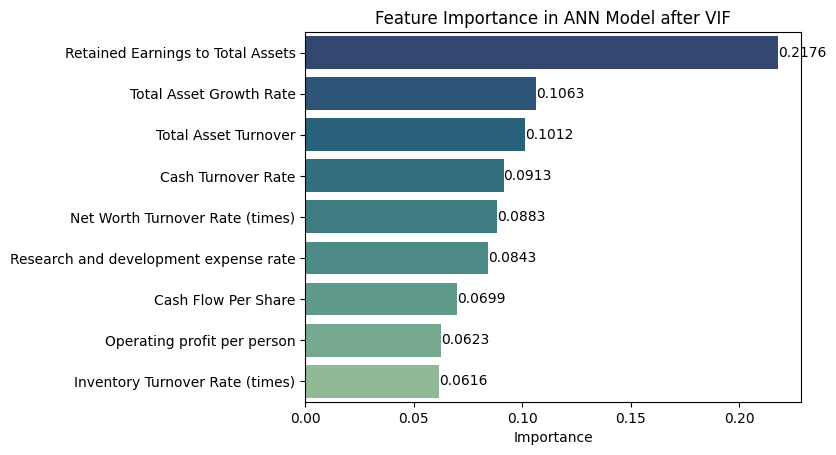

In [88]:
ann_feature_importance = pd.DataFrame({'Feature': X9.columns, 'Importance': np.abs(avifimportance)})
ann_feature_importance = ann_feature_importance.sort_values('Importance', ascending=False)
ann_feature_importance=ann_feature_importance.head(9)

ax=sns.barplot(x='Importance',y='Feature',data=ann_feature_importance,palette='crest_r')
plt.title('Feature Importance in ANN Model after VIF')
plt.ylabel('')
#plt.legend(loc='lower right')
ax.bar_label(ax.containers[0],fmt='%.4f')

plt.show()

After applying VIF, these are the features that have high coefficients in determining bankruptcy. 
Retained earnings to total assets is the amount of reinvested earnings or losses to total assets (RE/TA). Companies with low (RE/TA) are financing capital expenditure through borrowings instead of earnings. Likewise, companies with high (RE/TA) may have a history of profitability and the ability to sustain a bad year of financial losses.

Total Asset Growth Rate indicates how quickly a company has been growing its assets. It is the percentage change in assets over a given period. It is straightfoward in a sense that companies with high total asset growth rate will be in a better position and less likely to be bankrupt than companies that do not.

Asset Turnover Ratio is the efficiency with which a company uses its assets to produce sales. Companies with high asset turnover ratio operates more efficiently as compared to companies with a lower ratio. Even though this feature is of importance, companies in different industries vary in this ratio.

### 5. Conclusion

A total of 6 different algorithms are used to predict bankruptcy. Based on the results, the use of Random Forest, XGBoost and ANN are the most effective in predicting bankruptcy. To further conclude, the models are already very accurate in the prediction of bankruptcy even before the use of VIF to reduce the number of variables.

It is good practice to always try to reduce the number of features in the model if the number of features are deemed too many. When handling large and complex datasets, reducing the features by any means will always help the model. It could be used before the initial modelling or after the modelling when trying to determine the causes or important features that affects the problem statement.

In this case, VIF is used to reduce the number of features from 95 to 54. VIF is often used in the industry to determine the multicollinearity of the features. Having too many features with multicollinearity makes the model less accurate and prone to overfitting. Even at 54 features, mutual information is further used to reduce the number of features from 54 to 14. The information gain of the features at least ensures that the model will be less noisy. With 14 features, it is easier to determine the underlying factors that cause bankruptcy, instead of analysing all 95 features all at once.